## KNN (K nearest neighbors)

Algoritmo usado es clasificación ocasionalmente se usa en regresiones pero usualmente es en clasificación. <br>
Se utiliza para clasificar un nuevo dato en funcion de su cercanía a los datos de entrenamiento. <br>

Sea k un valor real para determinar el numero de vecinos mas cercanos que se consideran para determinar <br>
la clasificación del nuevo punto de datos. <br>

## Calculo de distancias

### Euclidean distance: 
La distancia entre dos puntos en un espacio multidimensional es la raíz cuadrada de la suma de las diferencias de cada coordenada elevadas al cuadrado.
$$ d(A, B) = \sqrt{\sum_{i=1}^{n} (x_i - y_i)^2} $$

<img src="/home/ari/Documents/inteligencia_artificial/euclidean_knn.png" alt="Descripción" width="500"/>

### Manhattan distance: 
La distancia entre dos puntos en un espacio multidimensional es la suma de las diferencias de cada coordenada.
$$ d(A, B) = \sum_{i=1}^{n} |x_i - y_i| $$
<img src="/home/ari/Documents/inteligencia_artificial/manhattan_knn.png" alt="Descripción" width="500"/>

### Minkowski distance: 
La distancia entre dos puntos en un espacio multidimensional es la raíz de la suma de las potencias de las diferencias de cada coordenada elevadas a un exponente dado.
$$ d(A, B) = \left(\sum_{i=1}^{n} |x_i - y_i|^p\right)^{1/p} $$


Resultados:
- Clasificación: se cuentan cuantos de esos K vecinos pertenecen a cada clase y se asignan al nuevo punto la clase que tenga mas votos.
- Regresión: Se determina la media de los valores de los K vecinos mas cercanos.

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
iris = load_iris()
X, y = iris.data, iris.target

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.5, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.9066666666666666
Confusion Matrix:
[[29  0  0]
 [ 0 23  0]
 [ 0  7 16]]


In [2]:
# Obtener la matriz de confusion dadas diferentes numeros de vecinos
for k in range(1, 11):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    print(f"Accuracy para k={k}:", accuracy_score(y_test, y_pred))
    print("Confusion Matrix para k={k}:")
    print(confusion_matrix(y_test, y_pred))
    print("---------------------------------")

Accuracy para k=1: 0.96
Confusion Matrix para k={k}:
[[29  0  0]
 [ 0 22  1]
 [ 0  2 21]]
---------------------------------
Accuracy para k=2: 0.9066666666666666
Confusion Matrix para k={k}:
[[29  0  0]
 [ 0 23  0]
 [ 0  7 16]]
---------------------------------
Accuracy para k=3: 0.96
Confusion Matrix para k={k}:
[[29  0  0]
 [ 0 23  0]
 [ 0  3 20]]
---------------------------------
Accuracy para k=4: 0.92
Confusion Matrix para k={k}:
[[29  0  0]
 [ 0 23  0]
 [ 0  6 17]]
---------------------------------
Accuracy para k=5: 0.96
Confusion Matrix para k={k}:
[[29  0  0]
 [ 0 23  0]
 [ 0  3 20]]
---------------------------------
Accuracy para k=6: 0.9466666666666667
Confusion Matrix para k={k}:
[[29  0  0]
 [ 0 23  0]
 [ 0  4 19]]
---------------------------------
Accuracy para k=7: 0.9733333333333334
Confusion Matrix para k={k}:
[[29  0  0]
 [ 0 23  0]
 [ 0  2 21]]
---------------------------------
Accuracy para k=8: 0.9466666666666667
Confusion Matrix para k={k}:
[[29  0  0]
 [ 0 23  0]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222 entries, 0 to 221
Data columns (total 2 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   marketing_budget(thousands)  222 non-null    float64
 1   actual_sales(millions)       222 non-null    float64
dtypes: float64(2)
memory usage: 3.6 KB
    marketing_budget(thousands)  actual_sales(millions)
0                        187.86                   12.14
1                        138.13                   12.33
2                        177.89                    8.41
3                        181.13                    8.90
4                        151.50                   12.57
5                        106.87                   11.30
6                        160.94                   11.66
7                        140.09                   10.93
8                        132.58                   11.99
9                        127.19                    9.44
10      

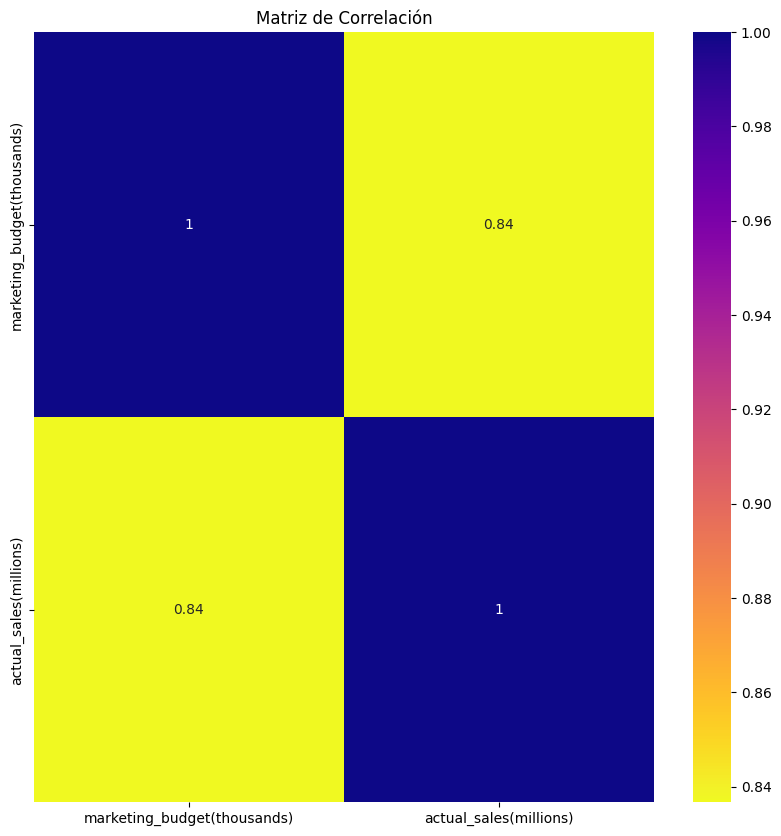

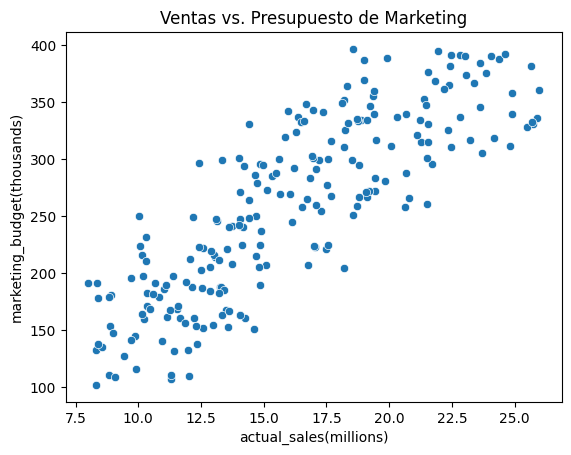

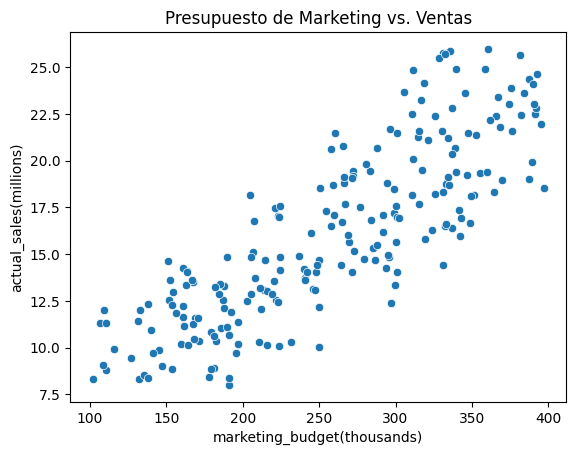

Mejores hiperparámetros encontrados: {'metric': 'euclidean', 'n_neighbors': np.int64(8), 'weights': 'uniform'}
R^2 Score: 0.58
Mean Absolute Error (MAE): 0.50
Mean Squared Error (MSE): 0.39
Root Mean Squared Error (RMSE): 0.62


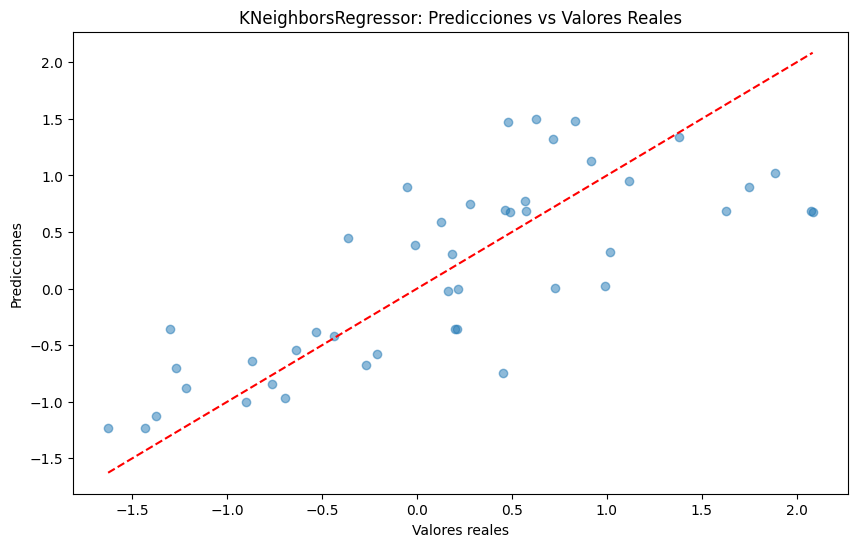

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

df=pd.read_csv('tareas/knnregresor/sales_dataset.csv')

df.copy()
df.info()
df.describe()
df.mean()
df.isna().sum()

# Mostrar las primeras filas
pd.set_option('display.max_rows', 100)
print(df.head(100))

# Ver los valores únicos de las columnas relevantes
print(df['marketing_budget(thousands)'].unique())
print(df['actual_sales(millions)'].unique())

# Correlación de las variables
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), cmap="plasma_r", annot=True)
plt.title("Matriz de Correlación")
plt.show()

# Gráficos de dispersión para visualizar la relación
sns.scatterplot(x='actual_sales(millions)', y='marketing_budget(thousands)', data=df)
plt.title("Ventas vs. Presupuesto de Marketing")
plt.show()

# Gráfico de dispersión inverso (también es útil)
sns.scatterplot(x='marketing_budget(thousands)', y='actual_sales(millions)', data=df)
plt.title("Presupuesto de Marketing vs. Ventas")
plt.show()

# Preprocesamiento de datos
# Verificamos si hay duplicados y los eliminamos si es necesario
if df.duplicated().sum() > 0:
    print(f"Se encontraron {df.duplicated().sum()} duplicados. Eliminándolos...")
    df = df.drop_duplicates()

# No es necesario aplicar LabelEncoder si las columnas son numéricas, mejor escalar los datos
scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[['marketing_budget(thousands)', 'actual_sales(millions)']] = scaler.fit_transform(df[['marketing_budget(thousands)', 'actual_sales(millions)']])

# Dividir en variables predictoras (X) y objetivo (y)
X = df_scaled.drop(['actual_sales(millions)'], axis=1)
y = df_scaled['actual_sales(millions)']

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Optimización de hiperparámetros usando GridSearchCV
param_grid = {
    'n_neighbors': np.arange(1, 21),  # Probar valores de 1 a 20
    'metric': ['euclidean', 'manhattan', 'minkowski'],  # Diferentes métricas de distancia
    'weights': ['uniform', 'distance'],  # Diferentes ponderaciones
}

# Crear el modelo KNN
knn = KNeighborsRegressor()

# Buscar los mejores hiperparámetros utilizando GridSearchCV
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Obtener el mejor modelo
best_knn = grid_search.best_estimator_
print("Mejores hiperparámetros encontrados:", grid_search.best_params_)

# Realizar predicciones con el modelo optimizado
y_pred_knn = best_knn.predict(X_test)

# Evaluar el modelo
mae = mean_absolute_error(y_test, y_pred_knn)
mse = mean_squared_error(y_test, y_pred_knn)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_knn)

print(f"R^2 Score: {r2:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

# Gráficas de las predicciones vs los valores reales
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred_knn, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
plt.title('KNeighborsRegressor: Predicciones vs Valores Reales')
plt.show()